### Importing Needed packages


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import os 
os.chdir("C:\\Users\\manka\\Documents\\GitHub\\IBM-AI-ML-course")


### Downloading Data

To download the data, we will use !wget to download it from IBM Object Storage.


In [36]:
# Download this file 
#!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/FuelConsumptionCo2.csv"

<h2 id="reading_data">Reading the data in adnd Data exploration </h2>

In [38]:
df = pd.read_csv("FuelConsumptionCo2.csv")
# take a look at the dataset

In [5]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_widgets()

Lets select some features to explore more.


In [6]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


we can plot each of these features:


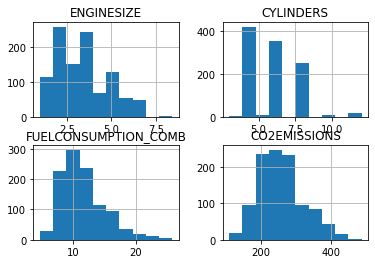

In [10]:
cdf.hist()
plt.show()

Now, lets plot each of these features vs the Emission, to see how linear is their relation:


<AxesSubplot:xlabel='CYLINDERS', ylabel='CO2EMISSIONS'>

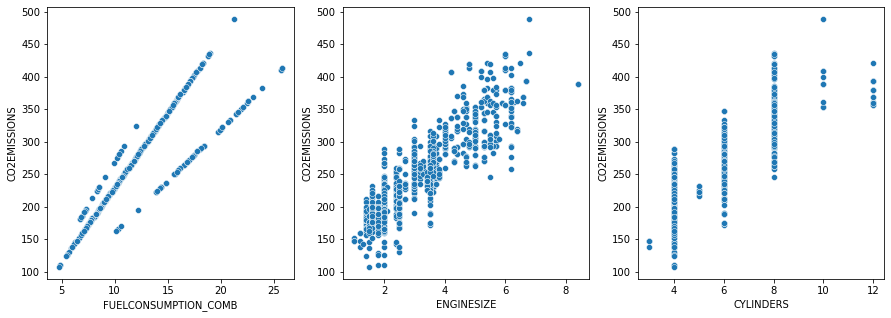

In [82]:
import seaborn as sns

fig, axs = plt.subplots(1,3,figsize=(15,5))
sns.scatterplot(x=df["FUELCONSUMPTION_COMB"], y= df["CO2EMISSIONS"], ax=axs[0])
sns.scatterplot(x=df["ENGINESIZE"], y= df["CO2EMISSIONS"], ax=axs[1])
sns.scatterplot(x=df["CYLINDERS"], y= df["CO2EMISSIONS"], ax=axs[2])

Double-click **here** for the solution.

<!-- Your answer is below:
    
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

-->


#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using **np.random.rand()** function: 


In [83]:
msk = np.random.rand(len(df)) < 0.8
train, test = cdf[msk], cdf[~msk]

<h2 id="simple_regression">Simple Regression Model</h2>
Linear Regression fits a linear model with coefficients $\theta = (\theta_1, ..., \theta_n)$ to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 


#### Train data distribution


#### Modeling

Using sklearn package to model data.


Coefficients:  [[39.52284873]]
Intercept:  [124.72992417]
Mean absolute error: 22.26
Residual sum of squares (MSE): 850.28
R2-score: 0.73


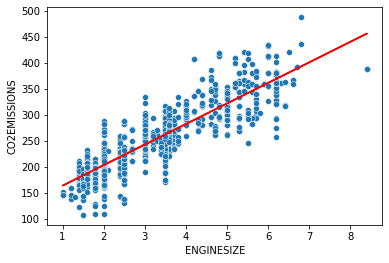

In [88]:
from sklearn import linear_model
from sklearn.metrics import r2_score

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)


# plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
sns.scatterplot(x=df["ENGINESIZE"], y= df["CO2EMISSIONS"])
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')


# Prediction and the error estimation
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

As mentioned before, **Coefficient** and **Intercept** in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 
Notice that all of the data must be available to traverse and calculate the parameters.


<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>
